In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

animalbites_df = pd.read_csv('Health_AnimalBites.csv')

In [4]:
animalbites_df.shape

(9003, 15)

In [5]:
animalbites_df.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN


In [6]:
animalbites_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9003 entries, 0 to 9002
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bite_date          8686 non-null   object 
 1   SpeciesIDDesc      8885 non-null   object 
 2   BreedIDDesc        3759 non-null   object 
 3   GenderIDDesc       6477 non-null   object 
 4   color              6426 non-null   object 
 5   vaccination_yrs    3738 non-null   float64
 6   vaccination_date   4115 non-null   object 
 7   victim_zip         7165 non-null   object 
 8   AdvIssuedYNDesc    2565 non-null   object 
 9   WhereBittenIDDesc  8387 non-null   object 
 10  quarantine_date    2020 non-null   object 
 11  DispositionIDDesc  1535 non-null   object 
 12  head_sent_date     395 non-null    object 
 13  release_date       1445 non-null   object 
 14  ResultsIDDesc      1543 non-null   object 
dtypes: float64(1), object(14)
memory usage: 1.0+ MB


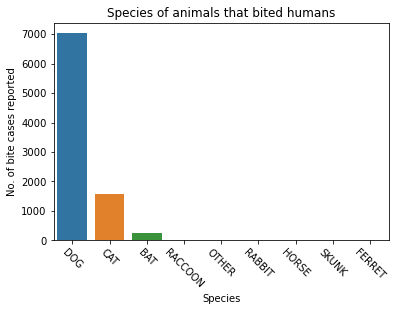

In [15]:
sns.countplot(x="SpeciesIDDesc", data= animalbites_df);
plt.title('Species of animals that bited humans')
plt.xlabel('Species')
plt.ylabel('No. of bite cases reported')
plt.xticks(rotation=-45)

plt.show()

In [19]:
animalbites_df['SpeciesIDDesc'].unique()

array(['DOG', 'CAT', 'BAT', 'RACCOON', 'OTHER', 'RABBIT', nan, 'HORSE',
       'SKUNK', 'FERRET'], dtype=object)

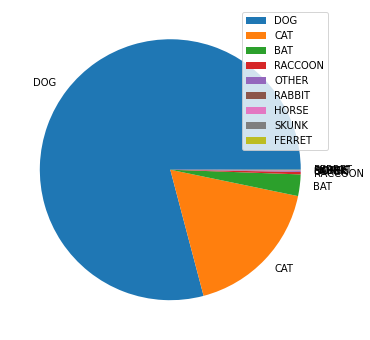

In [38]:
y = np.array(animalbites_df['SpeciesIDDesc'].value_counts())
mylabels = ['DOG', 'CAT', 'BAT', 'RACCOON', 'OTHER', 'RABBIT', 'HORSE',
       'SKUNK', 'FERRET']
plt.figure(figsize=(18,6))
plt.pie(y, labels = mylabels)
plt.axis('equal')
plt.legend()
plt.show() 

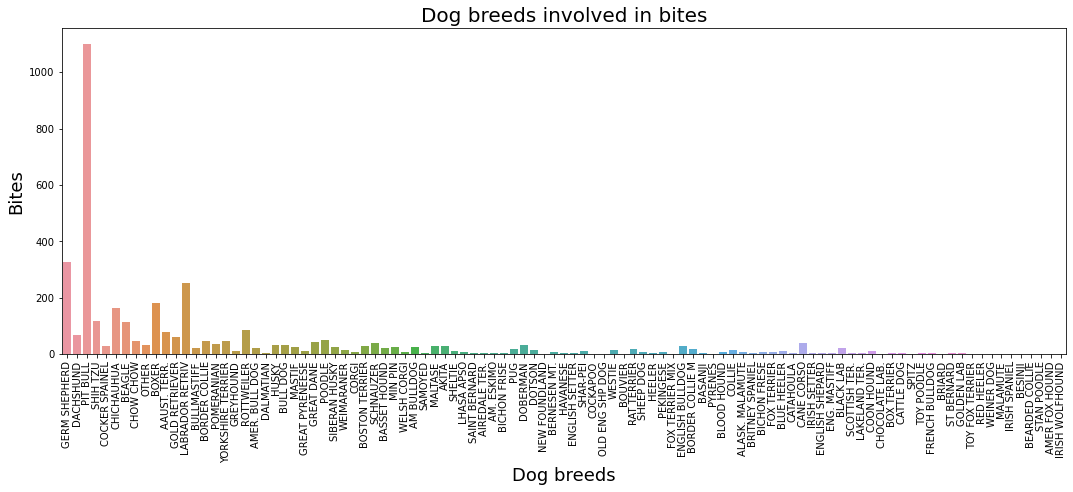

In [33]:
dog_breeds = animalbites_df[animalbites_df['SpeciesIDDesc'] == "DOG"]

plt.figure(figsize=(18,6))
sns.countplot(dog_breeds['BreedIDDesc'])
plt.title("Dog breeds involved in bites", fontsize=20)
plt.xlabel('Dog breeds', fontsize=18)
plt.ylabel('Bites', fontsize=18)
plt.xticks(fontsize=10, rotation=90)
plt.show()

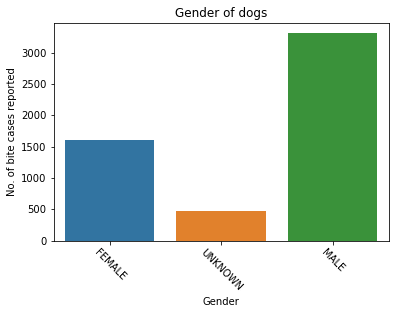

In [34]:
dog_breeds = animalbites_df[animalbites_df['SpeciesIDDesc'] == "DOG"]
sns.countplot(x="GenderIDDesc", data= dog_breeds);
plt.title('Gender of dogs')
plt.xlabel('Gender')
plt.ylabel('No. of bite cases reported')
plt.xticks(rotation=-45)

plt.show()